<a href="https://colab.research.google.com/github/muqarrab1217/ECG_Detection/blob/main/ECG_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio --upgrade
!pip install efficientnet_pytorch matplotlib scikit-learn opencv-python

!unzip MyocardialInfarctionPatients.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [6]:
import zipfile
import os

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)

import zipfile

extract_path = "ecg_dataset_complete"

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete.")


Saving train.zip to train.zip
Uploaded file: train.zip
✅ Extraction complete.


In [8]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transforms
image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(5),
        transforms.ColorJitter(contrast=0.3),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
}

# Dataset path (your structure)
data_dir = '/content/ecg_dataset_complete/train'

# Load dataset with class folders
full_dataset = datasets.ImageFolder(root=data_dir, transform=image_transforms['train'])

# Save class names
class_names = full_dataset.classes
print(f"Detected classes: {class_names}")

# Split into train/val
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = random_split(full_dataset, [train_size, val_size])
val_set.dataset.transform = image_transforms['val']

# Dataloaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)


Detected classes: ['HistoryofMyocardialInfarction', 'MyocardialInfarctionPatients', 'NormalPerson', 'abnormalheartbeat']


In [10]:
import torch.nn as nn
!pip install -q efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EfficientNet.from_pretrained('efficientnet-b0')
num_features = model._fc.in_features
model._fc = nn.Linear(num_features, len(class_names))  # 4-class output
model = model.to(device)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 130MB/s] 


Loaded pretrained weights for efficientnet-b0


In [11]:
import torch.optim as optim
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss:.4f} - Train Acc: {acc:.2f}%")
        validate_model(model, val_loader)

def validate_model(model, val_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Validation Accuracy: {100 * correct / total:.2f}%")

train_model(model, train_loader, val_loader, epochs=15)


100%|██████████| 76/76 [16:38<00:00, 13.14s/it]


Epoch [1/15] - Loss: 54.2718 - Train Acc: 78.87%
Validation Accuracy: 26.28%


100%|██████████| 76/76 [16:21<00:00, 12.92s/it]


Epoch [2/15] - Loss: 11.6060 - Train Acc: 95.66%
Validation Accuracy: 28.76%


100%|██████████| 76/76 [16:43<00:00, 13.21s/it]


Epoch [3/15] - Loss: 5.2846 - Train Acc: 98.01%
Validation Accuracy: 29.42%


100%|██████████| 76/76 [16:50<00:00, 13.30s/it]


Epoch [4/15] - Loss: 2.7306 - Train Acc: 99.30%
Validation Accuracy: 38.02%


100%|██████████| 76/76 [16:26<00:00, 12.99s/it]


Epoch [5/15] - Loss: 1.9899 - Train Acc: 99.21%
Validation Accuracy: 46.45%


100%|██████████| 76/76 [16:45<00:00, 13.23s/it]


Epoch [6/15] - Loss: 1.9314 - Train Acc: 99.38%
Validation Accuracy: 64.46%


100%|██████████| 76/76 [16:44<00:00, 13.22s/it]


Epoch [7/15] - Loss: 1.8982 - Train Acc: 99.26%
Validation Accuracy: 92.56%


100%|██████████| 76/76 [16:41<00:00, 13.18s/it]


Epoch [8/15] - Loss: 1.7151 - Train Acc: 99.46%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:43<00:00, 13.20s/it]


Epoch [9/15] - Loss: 1.5274 - Train Acc: 99.46%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:40<00:00, 13.17s/it]


Epoch [10/15] - Loss: 0.9684 - Train Acc: 99.71%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:31<00:00, 13.05s/it]


Epoch [11/15] - Loss: 1.0471 - Train Acc: 99.75%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:52<00:00, 13.32s/it]


Epoch [12/15] - Loss: 0.3187 - Train Acc: 99.96%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:36<00:00, 13.12s/it]


Epoch [13/15] - Loss: 0.4960 - Train Acc: 99.83%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:32<00:00, 13.06s/it]


Epoch [14/15] - Loss: 0.4034 - Train Acc: 99.88%
Validation Accuracy: 100.00%


100%|██████████| 76/76 [16:52<00:00, 13.32s/it]


Epoch [15/15] - Loss: 0.4997 - Train Acc: 99.83%
Validation Accuracy: 100.00%



Classification Report:
                               precision    recall  f1-score   support

HistoryofMyocardialInfarction       1.00      1.00      1.00        96
 MyocardialInfarctionPatients       1.00      1.00      1.00       193
                 NormalPerson       1.00      1.00      1.00       157
            abnormalheartbeat       1.00      1.00      1.00       159

                     accuracy                           1.00       605
                    macro avg       1.00      1.00      1.00       605
                 weighted avg       1.00      1.00      1.00       605



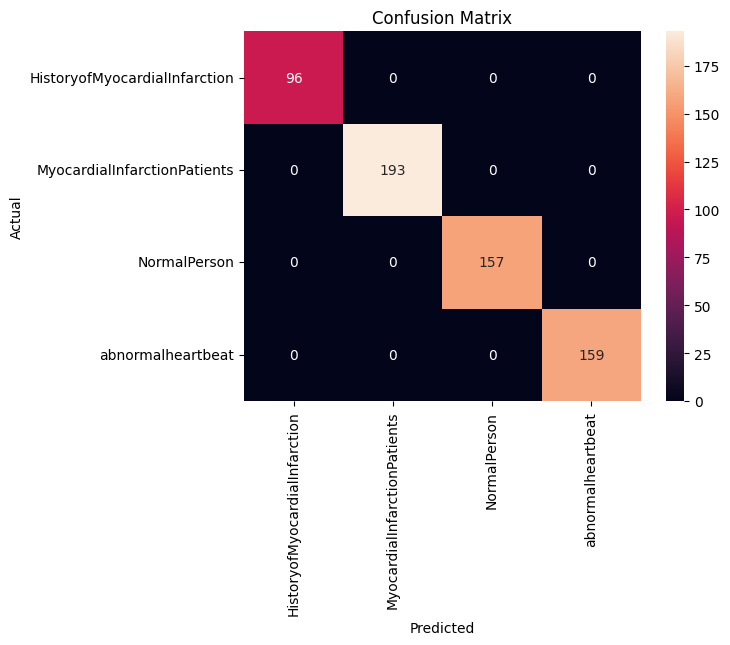

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, val_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate(model, val_loader)


In [13]:
torch.save(model.state_dict(), 'efficientnet_ecg_classifier.pth')

In [15]:
from PIL import Image

# Load model back
model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc = nn.Linear(model._fc.in_features, len(class_names))
model.load_state_dict(torch.load('efficientnet_ecg_classifier.pth', map_location=device))
model = model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

def predict_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img)
        probs = torch.softmax(outputs, dim=1)[0]
        _, predicted = torch.max(probs, 0)
    print(f"🖼️  {image_path} ➜ {class_names[predicted.item()]} ({probs[predicted]:.2%})")
    return class_names[predicted.item()], probs[predicted].item()

test_folder = 'ecg_dataset_complete'
for file in os.listdir(test_folder):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        predict_image(os.path.join(test_folder, file))


Loaded pretrained weights for efficientnet-b0


In [17]:
import pandas as pd

def predict_folder_to_csv(folder_path, output_csv='predictions.csv'):
    results = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('RGB')
            img_t = transform(img).unsqueeze(0).to(device)
            with torch.no_grad():
                outputs = model(img_t)
                probs = torch.softmax(outputs, dim=1)[0]
                pred_idx = torch.argmax(probs).item()
                pred_class = class_names[pred_idx]
                confidence = probs[pred_idx].item()
            results.append({'Image': filename, 'Predicted Class': pred_class, 'Confidence': confidence})

    pd.DataFrame(results).to_csv(output_csv, index=False)
    print(f"✅ Predictions saved to {output_csv}")

predict_folder_to_csv('ecg_dataset_complete')


✅ Predictions saved to predictions.csv


In [18]:
def dice_score(y_true, y_pred, smooth=1e-6):
    # Assumes y_true and y_pred are torch tensors (binary: 0 or 1)
    y_true_flat = y_true.view(-1)
    y_pred_flat = y_pred.view(-1)

    intersection = (y_true_flat * y_pred_flat).sum()
    return (2. * intersection + smooth) / (y_true_flat.sum() + y_pred_flat.sum() + smooth)
